In [1]:
#1 Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

Vietcombank

In [ ]:
# 2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
vcb = pd.read_csv('/content/VCB.csv',sep=";")
vcb = vcb[['Price']]
vcb = vcb.dropna() # Drop missing values
vcb = vcb.reset_index(drop=True) # Reset the index

In [ ]:
vcb

,Price
0,22899
1,23169
2,22899
3,22738
4,22576
...,...
1991,80900
1992,80900
1993,81800
1994,82800


In [ ]:
#Split the data into training, testing
train_size = int(0.9 * len(vcb))
test_size = len(vcb) - train_size

train_data = vcb[:train_size]
test_data = vcb[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = vcb.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[97532.86308284 97571.64877719 97610.43447154 97649.22016589
 97688.00586024 97726.79155459 97765.57724894 97804.36294329
 97843.14863764 97881.93433199 97920.72002634 97959.50572069
 97998.29141504 98037.07710939 98075.86280374 98114.64849809
 98153.43419244 98192.21988679 98231.00558113 98269.79127548
 98308.57696983 98347.36266418 98386.14835853 98424.93405288
 98463.71974723 98502.50544158 98541.29113593 98580.07683028
 98618.86252463 98657.64821898]


In [ ]:
# 6. Tính RMSE, MAPE, MSLE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 7933.492332742277
MAPE: 7.474038946231547
MSLE:  0.007405553193427763


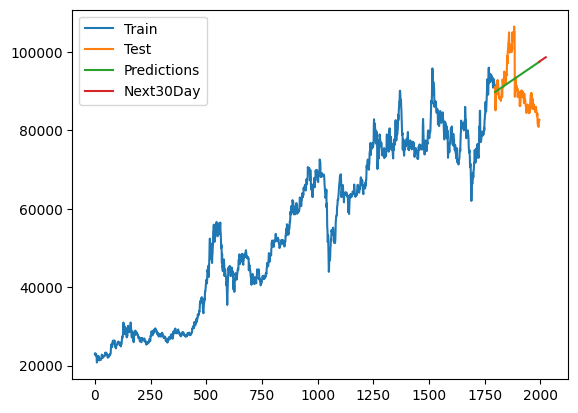

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1781, stop=1979, step=1)

MB bank

In [2]:
#2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
mbb = pd.read_csv('/content/MBB.csv')
mbb = mbb[['Price']]
mbb = mbb.dropna() # Drop missing values
mbb = mbb.reset_index(drop=True) # Reset the index

In [3]:
mbb

,Price
0,4894
1,4929
2,4859
3,4824
4,4789
...,...
1991,18150
1992,18300
1993,18400
1994,18450


In [4]:
#Split the data into training, testing
train_size = int(0.9 * len(mbb))
test_size = len(mbb) - train_size

train_data = mbb[:train_size]
test_data = mbb[train_size:train_size+test_size]

In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [7]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  mbb.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days')
print(y_next_30_days)

Predicted closing prices for the next 30 days
[24432.10250456 24442.62039598 24453.13828741 24463.65617883
 24474.17407025 24484.69196168 24495.2098531  24505.72774453
 24516.24563595 24526.76352738 24537.2814188  24547.79931022
 24558.31720165 24568.83509307 24579.3529845  24589.87087592
 24600.38876735 24610.90665877 24621.42455019 24631.94244162
 24642.46033304 24652.97822447 24663.49611589 24674.01400731
 24684.53189874 24695.04979016 24705.56768159 24716.08557301
 24726.60346444 24737.12135586]


In [8]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 4894.464351989387
MAPE: 25.85394037520392
MSLE:  0.05520625058089517


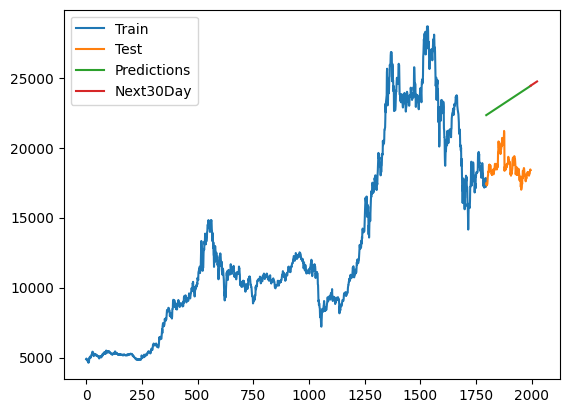

In [9]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [10]:
test_data.index

RangeIndex(start=1796, stop=1996, step=1)

BIDV

In [11]:
#2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
bidv = pd.read_csv('/content/BIDV.csv')
bidv = bidv[['Price']]
bidv = bidv.dropna() # Drop missing values
bidv = bidv.reset_index(drop=True) # Reset the index

In [12]:
bidv

,Price
0,14155
1,14225
2,13592
3,13240
4,13380
...,...
1991,41800
1992,42450
1993,43200
1994,43000


In [13]:
#Split the data into training, testing
train_size = int(0.9 * len(bidv))
test_size = len(bidv) - train_size

train_data = bidv[:train_size]
test_data = bidv[train_size:train_size+test_size]

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [16]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  bidv.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days')
print(y_next_30_days)

Predicted closing prices for the next 30 days
[46032.29626059 46049.830834   46067.36540741 46084.89998081
 46102.43455422 46119.96912763 46137.50370104 46155.03827445
 46172.57284785 46190.10742126 46207.64199467 46225.17656808
 46242.71114149 46260.24571489 46277.7802883  46295.31486171
 46312.84943512 46330.38400853 46347.91858193 46365.45315534
 46382.98772875 46400.52230216 46418.05687557 46435.59144897
 46453.12602238 46470.66059579 46488.1951692  46505.7297426
 46523.26431601 46540.79888942]


In [17]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 2859.967592564395
MAPE: 5.489742784236871
MSLE:  0.00425023028890791


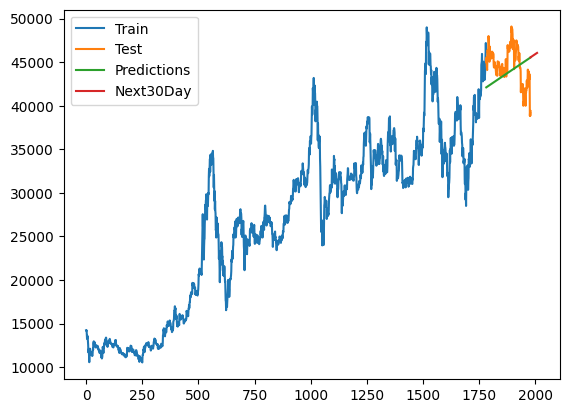

In [ ]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1781, stop=1979, step=1)